In [1]:
!pip install pandas matplotlib


In [2]:
import sqlite3

# Connect to SQLite database (creates it if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create a table
cursor.execute("""
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")

# Insert sample data
sample_data = [
    ("Product A", 10, 20.5),
    ("Product B", 5, 50.0),
    ("Product A", 7, 20.5),
    ("Product C", 3, 100.0),
    ("Product B", 2, 50.0),
    ("Product C", 1, 100.0),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()


Sales Summary:
      product  total_qty  revenue
0  Product A         17    348.5
1  Product B          7    350.0
2  Product C          4    400.0


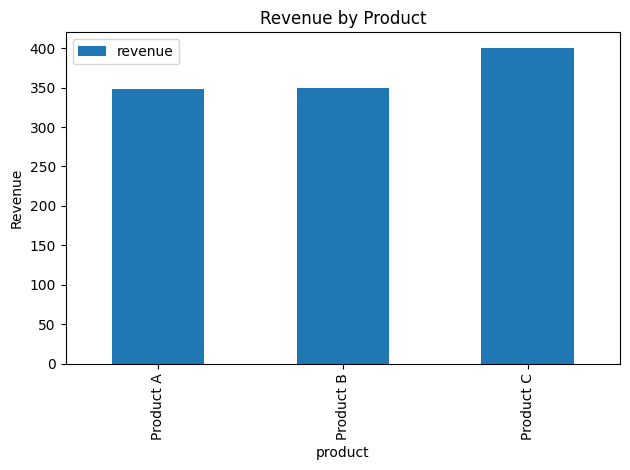

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("sales_data.db")

# SQL Query
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Display results
print("Sales Summary:\n", df)

# Plot revenue
df.plot(kind='bar', x='product', y='revenue', title="Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

conn.close()
